In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 
import os
import numpy as np

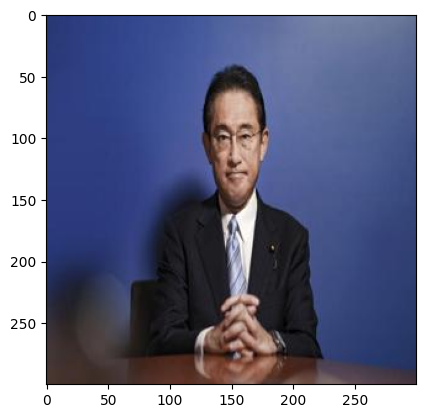

In [24]:
img = image.load_img("dataset/test/fumio_kishida/FumioKishida2.jpg")
plt.imshow(img)

In [13]:
cv2.imread("dataset/test/fumio_kishida/FumioKishida1.jpg").shape

(300, 300, 3)

In [3]:
train = ImageDataGenerator(rescale=1/255)
valid = ImageDataGenerator(rescale=1/255)

In [17]:
train_dataset = train.flow_from_directory('dataset/train/', target_size= (200,200), batch_size=32, class_mode='binary')
valid_dataset = train.flow_from_directory('dataset/valid/', target_size= (200,200), batch_size=32, class_mode='binary')

Found 1920 images belonging to 4 classes.
Found 240 images belonging to 4 classes.


In [19]:
train_dataset.class_indices

{'fumio_kishida': 0, 'joe_biden': 1, 'narendra_modi': 2, 'scott_morrison': 3}

In [12]:
cnn = tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(16,(3,3), activation='relu', input_shape=(300,300,3)))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(2,2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(512,activation='relu'))
cnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))

In [13]:
cnn.compile(loss='categorical_crossentropy', optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])

In [14]:
cnn_fit = cnn.fit(train_dataset, steps_per_epoch=3, epochs=10, validation_data=valid_dataset)

Epoch 1/10


c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\util\dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


InvalidArgumentError: Graph execution error:

Detected at node sequential_2/dense_4/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1077, in launch_instance

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 604, in run_forever

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 529, in dispatch_queue

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 518, in process_one

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 424, in dispatch_shell

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelbase.py", line 766, in execute_request

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3048, in run_cell

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3103, in _run_cell

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3308, in run_cell_async

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3490, in run_ast_nodes

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\interactiveshell.py", line 3550, in run_code

  File "C:\Users\andi1\AppData\Local\Temp\ipykernel_336\49841194.py", line 1, in <module>

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1150, in train_step

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 590, in __call__

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\sequential.py", line 398, in call

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 515, in call

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\functional.py", line 672, in _run_internal_graph

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\base_layer.py", line 1149, in __call__

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 96, in error_handler

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py", line 255, in call

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\activations.py", line 306, in relu

  File "c:\Users\andi1\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5395, in relu

Matrix size-incompatible: In[0]: [32,33856], In[1]: [78400,512]
	 [[{{node sequential_2/dense_4/Relu}}]] [Op:__inference_train_function_2323]